In [14]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Use absolute path to ensure we find the src directory
project_root = Path("/Users/david/Code/msc")
src_path = project_root / "src"
print(f"Looking for src at: {src_path}")
print(f"Does src directory exist: {src_path.exists()}")
if src_path.exists():
    print(f"Contents of src: {list(src_path.glob('*'))}")

sys.path.append(str(src_path))
print(f"Added to sys.path: {src_path}")

# Debug current working directory for reference
print(f"Current working directory: {Path.cwd()}")

from project_setup import get_project_root, make_paths, new_run_dir, save_data
from plotting import savefig

root = get_project_root()
paths = make_paths(root)
run_dir = new_run_dir(paths, label="week_2")

print(f"Project root: {paths.root}")
print(f"Run directory: {run_dir}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Looking for src at: /Users/david/Code/msc/src
Does src directory exist: True
Contents of src: [PosixPath('/Users/david/Code/msc/src/project_setup.py'), PosixPath('/Users/david/Code/msc/src/plotting.py'), PosixPath('/Users/david/Code/msc/src/__pycache__')]
Added to sys.path: /Users/david/Code/msc/src
Current working directory: /Users/david/Code/msc
Project root: /Users/david/Code/msc
Run directory: /Users/david/Code/msc/outputs/runs/week_2


In [ ]:
def read_spectrum_file(filepath):
    """
    Reads a spectral ASCII file with header comments.
    Returns the metadata dictionary and a pandas DataFrame for the data.
    """
    filepath = Path(filepath)
    metadata = {}
    
    # Read metadata header
    with open(filepath, 'r') as f:
        for line in f:
            line = line.strip()
            if not line.startswith('#'):
                break
            # Parse comments like '# KEY: VALUE'
            parts = line.lstrip('#').split(':', 1)
            if len(parts) == 2:
                key = parts[0].strip()
                value = parts[1].strip()
                metadata[key] = value
                
    # Read data
    df = pd.read_csv(filepath, comment='#', delim_whitespace=True, names=['wavelength', 'flux'])
    
    return metadata, df

In [9]:
# Read data using the paths object
metadata, df = read_spectrum_file(paths.data_external / "week2/tns_2018big_2018-05-18_07-57-42_P60_SED-Machine_ZTF.ascii")

print("Metadata loaded:")
for k, v in metadata.items():
    print(f"{k}: {v}")

print("\nData shape:", df.shape)
df.head()

Metadata loaded:
TELESCOPE: P60
INSTRUMENT: SED-Machine
USER: sedmdrp
REQ_ID: 20180514185508964
OBJECT: ZTF18aasdted
OUTFILE: ZTF18aasdted_SEDM.txt
RA: 17:25:25.80
DEC: +59:25:41.5
OBSUTC: 2018-05-18 07:57:42.7
EXPTIME: 1800
SKYSUB: On
QUALITY: 2
REDUCER: neill
AIRMASS: 1.15
RAPASEC: 3.4
SKYLFWHMNM: 8.4
TRACEFWHMPX: 2.4
SNIDMATCHTYPE: Ia
SNIDMATCHSUBTYPE: norm
SNIDMATCHRLAP: 16.42
SNIDMATCHREDSHIFT: 0.0154
SNIDZMED: 0.013
SNIDZMEDERR: 0.0068
SNIDAGEM: -3.5
SNIDAGEMERR: 5.91
SNIDFRAC_IA: 0.99
SNIDFRAC_IB: 0.0
SNIDFRAC_IC: 0.01
SNIDFRAC_II: 0.0
SNIDFRAC_NOTSN: 0.0

Data shape: (208, 2)


,wavelength,flux
0,3812.3,2.112600e-15
1,3827.5,2.386200e-15
2,3842.6,2.607500e-15
3,3857.8,2.641600e-15
4,3872.9,2.915800e-15


Plot saved to: /Users/david/Code/msc/outputs/runs/week_2/figures/2026-01-24_spectrum_of_ztf18aasdted_2018-05-18_0757427.png


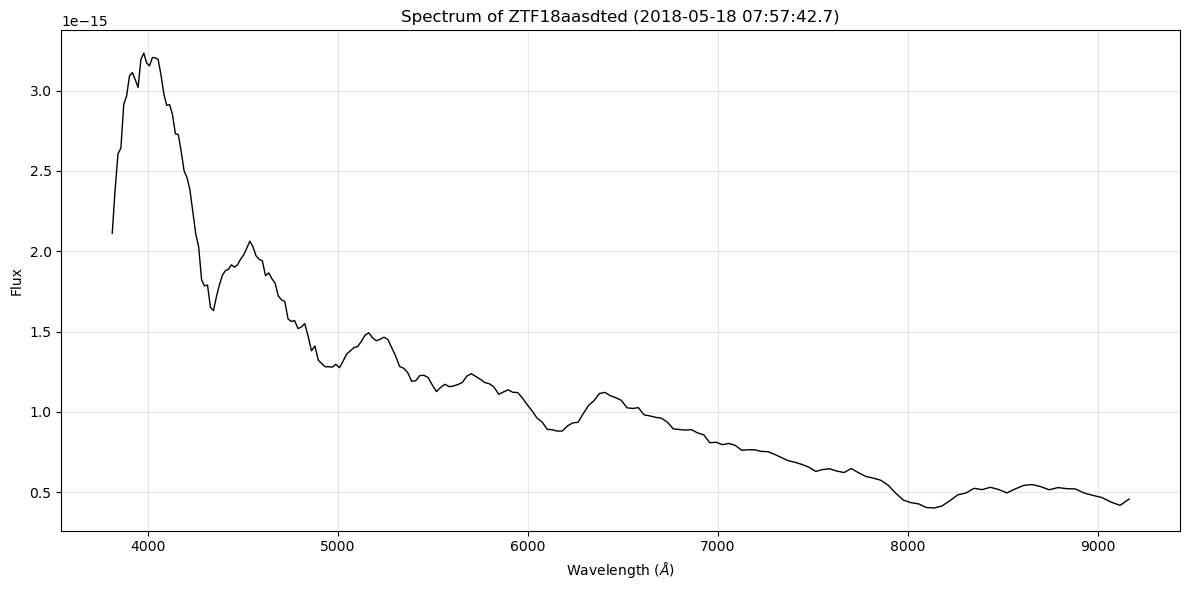

In [11]:
from src.plotting import plot_spectrum

# Plot using the new function in src.plotting
plot_path = plot_spectrum(df, run_dir, metadata=metadata)
print(f"Plot saved to: {plot_path}")
plt.show()